# Часть 1

## Задание 1

Генерация стандартно распределенной генеральной совокупности

In [1]:
N <- 200
X1 <- rnorm(N,0,1)

$$ r_1 \in [0.1; 0.2], \quad r_2 \in [0.6; 0.9]$$

In [2]:
r_1 <- .15
r_2 <- .8

Построить еще две выборки `X2` и `X3` 
$$ X2 = r_{1} X1 + \sqrt{1 - r_{1}^{2} }*rnorm(N, 0, 1) $$
$$ X3 = r_{2} X1 + \sqrt{1 - r_{2}^{2} }*rnorm(N, 0, 1) $$


In [3]:
X2 <- r_1 * X1 + sqrt(1 - r_1^2) * rnorm(N,0,1)
X3 <- r_2 * X1 + sqrt(1 - r_2^2) * rnorm(N,0,1)

Диаграммы рассеяния для <br> `X1 и X2`<br> `X1 и X3`<br> `X2 и X3`


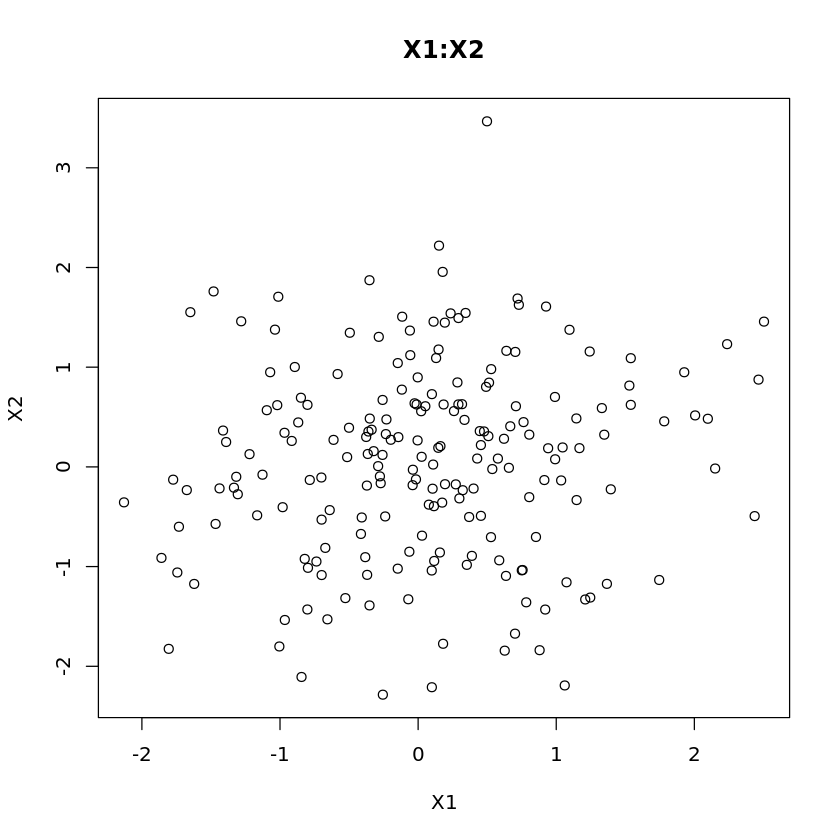

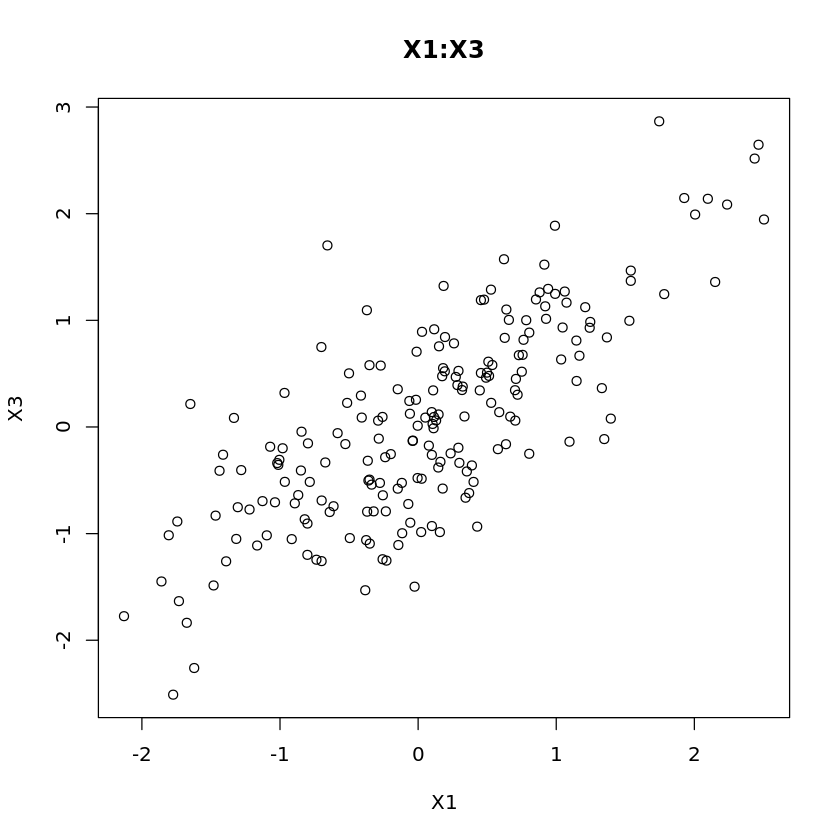

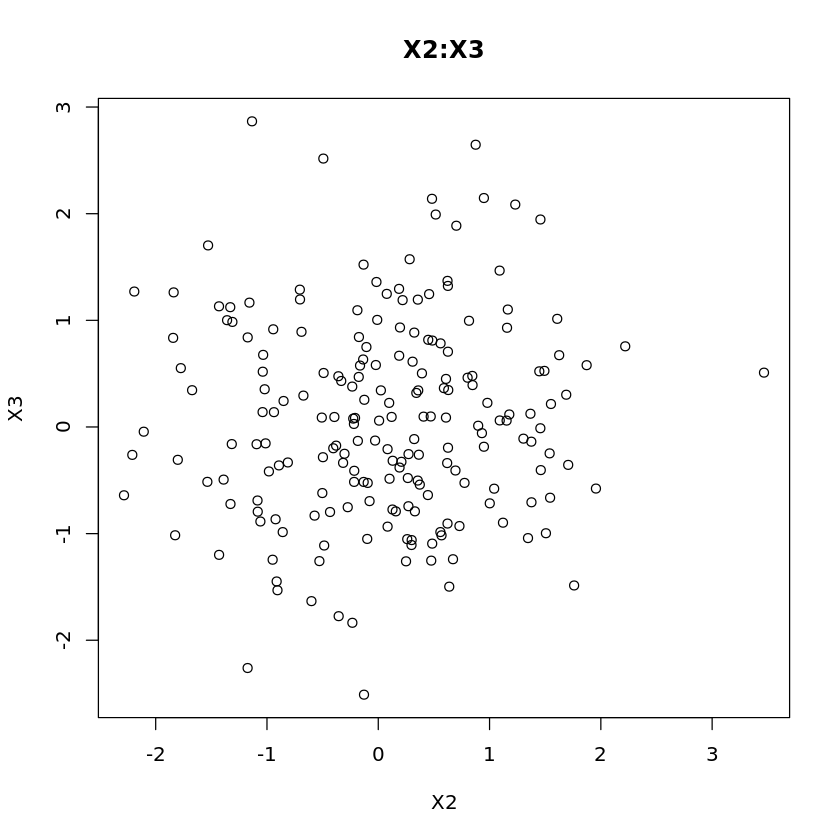

In [4]:
plot(X1,X2,type='p', main='X1:X2')
plot(X1,X3,type='p', main='X1:X3')
plot(X2,X3,type='p', main='X2:X3')

Парные коэффиценты корреляции<br>
$\hat{r}_{1}$
<br>
$\hat{r}_{2}$
<br>
$\hat{r}_{3}$

In [5]:
r_1_estimate <- cor(X1,X2)
r_2_estimate <- cor(X1,X3)
r_3_estimate <- cor(X2,X3)
r_1_estimate
r_2_estimate
r_3_estimate

[1] 0.1134879

[1] 0.7638872

[1] 0.05262706

Статистики Стьюдента <br> Как расичтать по оценкам параметров?<br>Какая формула?

In [12]:
t_statistic_1 <- cor.test(X1,X2)$estimate
t_statistic_2 <- cor.test(X1,X3)$estimate
t_statistic_3 <- cor.test(X2,X3)$estimate
t_statistic_1
t_statistic_2
t_statistic_3

cor 
0.1134879

cor 
0.7638872

cor 
0.05262706

Построить доверительный интервал для корреляционного коэффициента с
помощью Z-преобразования Фишера.<br>Критическое значение z-статистики для уровня доверия 95%
`z <- qnorm(0.975)` для двустороннего доверительного интервала.<br>
$$\text{Left bound} = z_{r} - z_{1-\frac{\alpha}{2}}\frac{1}{\sqrt{n-3}}$$
$$\text{Right bound} = z_{r} + z_{1-\frac{\alpha}{2}} \times \frac{1}{\sqrt{n-3}}$$
$$z_{r} = \frac{1}{2} \ln \left( \frac{1 + r}{1 - r} \right)$$


In [13]:
z_25 <- qnorm(0.975)
Z_Fisher_transform_1 <- 0.5 * log((1 + t_statistic_1) / (1 - t_statistic_1))

left_bound_1 <- tanh(Z_Fisher_transform_1 - z_25 / sqrt(N - 3))
right_bound_1 <- tanh(Z_Fisher_transform_1 + z_25 / sqrt(N - 3))

Z_Fisher_transform_2 <- 0.5 * log((1 + t_statistic_2) / (1 - t_statistic_2))

left_bound_2 <- tanh(Z_Fisher_transform_2 - z_25 / sqrt(N - 3))
right_bound_2 <- tanh(Z_Fisher_transform_2 + z_25 / sqrt(N - 3))

Z_Fisher_transform_3 <- 0.5 * log((1 + t_statistic_3) / (1 - t_statistic_3))

left_bound_3 <- tanh(Z_Fisher_transform_3 - z_25 / sqrt(N - 3))
right_bound_3 <- tanh(Z_Fisher_transform_3 + z_25 / sqrt(N - 3))

cat(left_bound_1, ' ', right_bound_1, '\n')
cat(left_bound_2, ' ', right_bound_2, '\n')
cat(left_bound_3, ' ', right_bound_3, '\n')

-0.02565709   0.248319 
0.699255   0.8161325 
-0.08674734   0.1899809 


## Задание 2

Парные коэффициенты корреляции Спирмена

In [14]:
spearman_estimate_1 <- cor.test(X1,X2,method = "spearman")$estimate
spearman_estimate_2 <- cor.test(X1,X3,method = "spearman")$estimate
spearman_estimate_3 <- cor.test(X2,X3,method = "spearman")$estimate

spearman_estimate_1
spearman_estimate_2
spearman_estimate_3

rho 
0.1105918

rho 
0.7325763

rho 
0.05712143

In [15]:
cor.test(X1,X2,method = "spearman")
cor.test(X1,X3,method = "spearman")
cor.test(X2,X3,method = "spearman")


	Spearman's rank correlation rho

data:  X1 and X2
S = 1185848, p-value = 0.1189
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1105918 



	Spearman's rank correlation rho

data:  X1 and X3
S = 356556, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7325763 



	Spearman's rank correlation rho

data:  X2 and X3
S = 1257140, p-value = 0.4214
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05712143 


# Часть 2

In [16]:
n <- 50
p <- .2
q1 <- .5
q2 <- .3

In [17]:
n_matrix <- matrix(0, nrow = 2, ncol = 2)
rownames(n_matrix) <- c("A", "NOT A")
colnames(n_matrix) <- c("B", "NOT B")

In [18]:
n1 <- rbinom(1, n, p)
n2 <- n - n1

In [24]:
n_matrix[1, 1] <- rbinom(1, n1, q1)
n_matrix[1, 2] <- n1 - n_matrix[1, 1]
n_matrix[2, 1] <- rbinom(1, n2, q2)
n_matrix[2, 2] <- n2 - n_matrix[2, 1]
n_matrix

,B,NOT B
A,7,1
NOT A,16,26


Подлкючение пакета rcompanion для нахождения коэффицента Крамера

In [25]:
library(rcompanion)

In [26]:
chisq.test(n_matrix)

Warning message in chisq.test(n_matrix):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  n_matrix
X-squared = 4.7641, df = 1, p-value = 0.02906


In [27]:
cramerV(n_matrix)

Cramer V 
  0.3634

In [28]:
cramerV(n_matrix, ci=TRUE)

Cramer.V,lower.ci,upper.ci
<dbl>,<dbl>,<dbl>
0.3634,0.1155,0.5737


## Часть 3

- n : Индекс. Тип данных : Порядковая
- rent : Стоимость аренды. Тип данных : Количественный
- s : Площадь. Тип данных : Количественный
- floor : Этаж. Тип данных : Ранговый 
- rooms : Количество комнат. Тип данных : Количественный
- walls : Тип стен. Тип данных : Номинальный <br> `По датафрейму можно предположить, что перменная означает есть ли стены. Но здравый рассудок подсказывает {кирпич, дерево} или иначе`
- district : Район. Тип данных : Номинальный
<hr>
Целевая перменная: Стоимость аренды (rent)

In [29]:
data <- read.csv("./Data/RentR.csv", sep=';')
data$s <- as.numeric(gsub(",", ".", data$s))

In [30]:
data

n,rent,s,floor,rooms,walls,district
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,11000,36,6,1,0,1
2,11000,33,1,1,0,4
3,12000,44,3,2,0,1
4,12000,64,9,2,0,1
5,10000,20,3,1,1,2
6,8000,19,5,1,1,1
7,16000,50,5,2,1,3
8,12000,44,3,1,1,3
9,13000,43,5,2,0,4


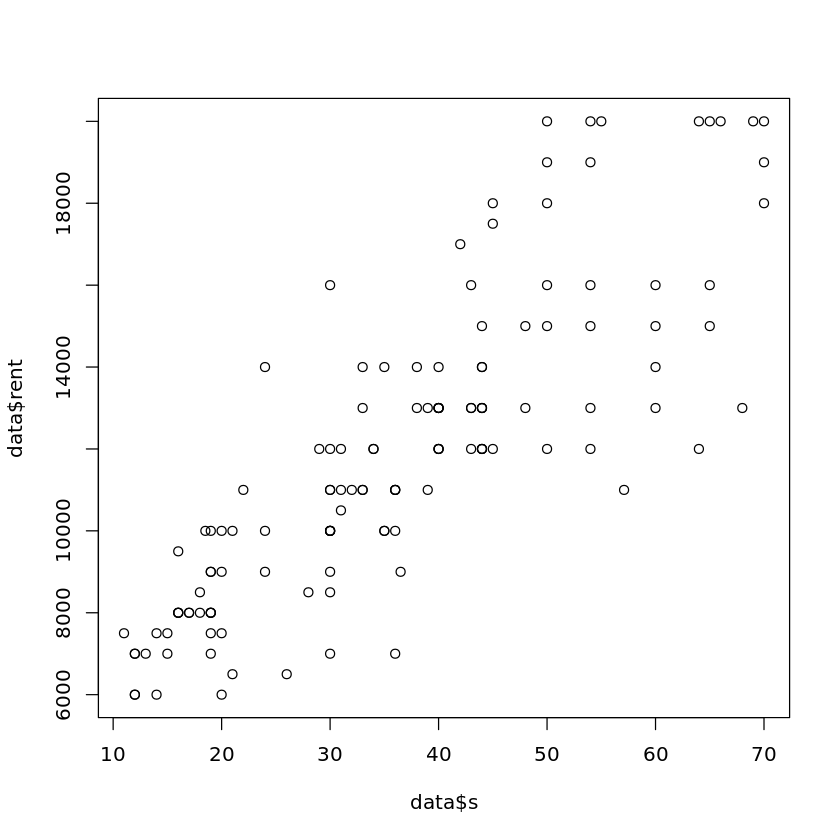

In [40]:
plot(data$s , data$rent , type='p')


In [32]:
cor.test(data$rent, data$s)


	Pearson's product-moment correlation

data:  data$rent and data$s
t = 17.085, df = 128, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7724688 0.8796590
sample estimates:
      cor 
0.8337581 


R Позваляет создать таблицу корреляций Пирсона.

In [43]:
cor(data[ ,- c(1,6,7)], method="spearman")

,rent,s,floor,rooms
rent,1.0000000,0.8594873,0.3751932,0.6092983
s,0.8594873,1.0000000,0.4065870,0.7219751
floor,0.3751932,0.4065870,1.0000000,0.1501535
rooms,0.6092983,0.7219751,0.1501535,1.0000000


Исключая из DataFrame те переменные, которые не подходят для теста Пирсона.
> Правильно ли, что этаж не корректно оценивать тестом Пирсона?

In [34]:
cor( data[, c("rent", "s", "rooms")])

,rent,s,rooms
rent,1.0000000,0.8337581,0.6103769
s,0.8337581,1.0000000,0.7378126
rooms,0.6103769,0.7378126,1.0000000


*Есть зависимость между количеством комнат и площадью.*

In [35]:
cor.test(data$rooms , data$s)


	Pearson's product-moment correlation

data:  data$rooms and data$s
t = 12.366, df = 128, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6479417 0.8074228
sample estimates:
      cor 
0.7378126 


Тестом $\chi^2$ произведу оценку корреляции номанальных переменных.

In [36]:
chisq.test(data$walls, data$district)


	Pearson's Chi-squared test

data:  data$walls and data$district
X-squared = 11.089, df = 3, p-value = 0.01125


In [37]:
if ( chisq.test(data$walls, data$district)$p.value < 0.05) { cat("Есть корреляция!") }

Есть корреляция!

In [38]:
cor.test(data$rent,data$floor,method = "spearman")

Warning message in cor.test.default(data$rent, data$floor, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$rent and data$floor
S = 228770, p-value = 1.091e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3751932 
